Datatrained
Evaluation Project - 5
Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


2 Outputs (classification)
>50K,
<=50K.
14 Inputs (string and continuous)
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Note: some data contain "?", so this value is possible for each of those 14 input fields



In [48]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



In [30]:
df=pd.read_csv("census.csv")

In [31]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [32]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [33]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


datafrme description:
    the dataset contain the data of Age', 'Workclass', 'Fnlwgt', 'Education', 'Education,       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country'.


    
in the above dataset the target is to predict 

checking the datatypes of the columns.


In [34]:
df.dtypes


Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [35]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

checking for null values

In [36]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Above are the 15 variable in the dataset, Income is the output variable which we will be using as testing data. We can study about each variable's characteristics now



In [37]:

df["Income"].nunique()

2

In [38]:
df.shape

(32560, 15)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The information above reveals that there are no missing values in the datatset.



In [40]:
df.describe()


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


data visualization

In [41]:
#Output variable

df['Income'].value_counts()



 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In the output variable we can find only 2 categories of data <=50k and >50k



<AxesSubplot:xlabel='Income', ylabel='count'>

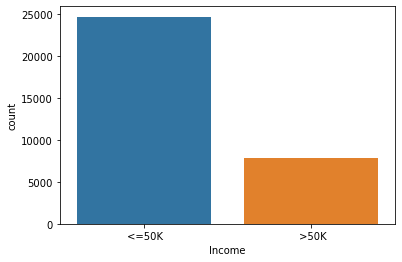

In [42]:
sns.countplot(df['Income'])


From the above data and count plot we can observe that 24719 people's income is <=50K and 7841 people's income is >50K



<AxesSubplot:>

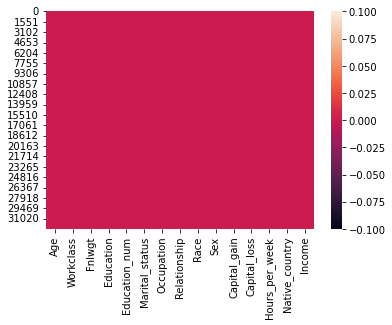

In [43]:
sns.heatmap(df.isnull())


We can see that there are no missing values present in the dataset



In [45]:
df['Age'].describe()


count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

The column 'Age' tells us about the age of the person, minimum age in the dataset is 17 and maximum age record is 90



<AxesSubplot:xlabel='Age', ylabel='Density'>

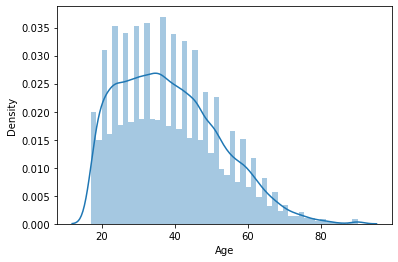

In [46]:
sns.distplot(df['Age'])


Above is the plot to see how the data is distributed in the column 'Age', maximum people's age in the age group 20 to 40



In [51]:
df['Workclass'].value_counts()


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='Workclass', ylabel='count'>

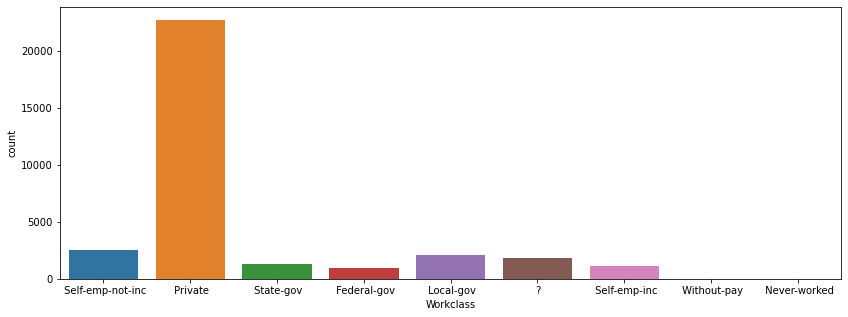

In [52]:
plt.figure(figsize = (14,5))
sns.countplot(df['Workclass'])


The column 'Workclass' tells about in which sectors the person is working, from the above plot tells that maximum number of people work in private sector, then comes self-emp-not-inc and Local-gov, there is a category '?' which tells that 1836 people's working sector is not defined



<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

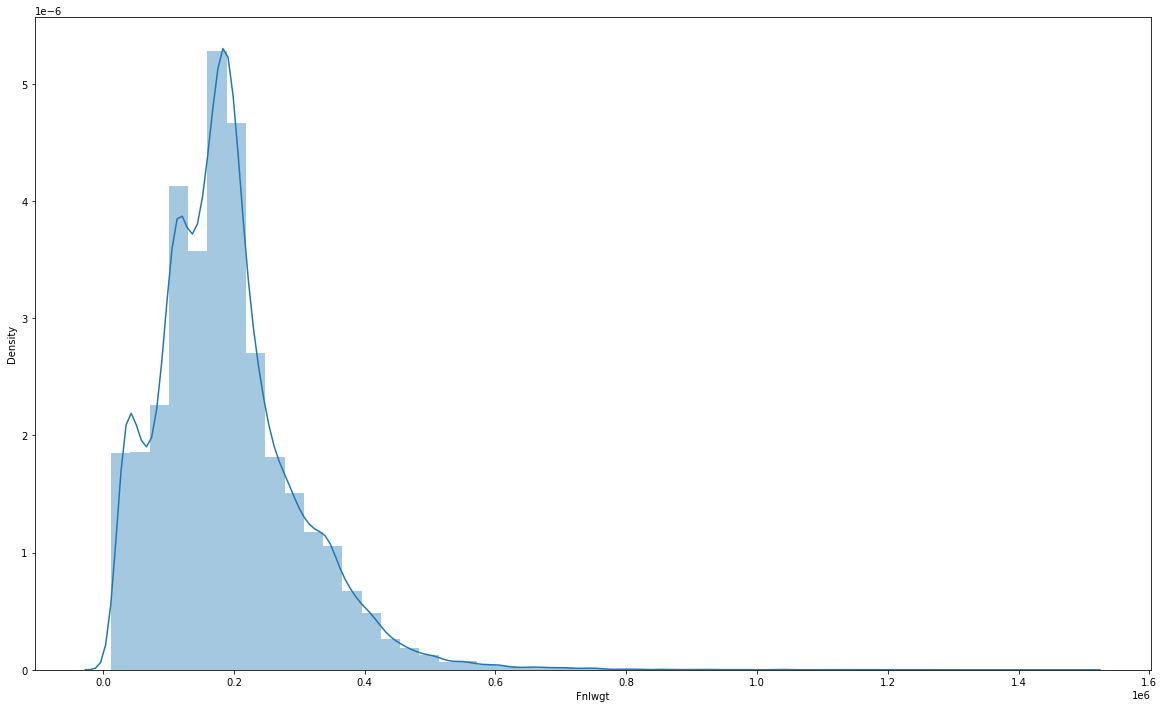

In [54]:
sns.distplot(df['Fnlwgt'])


This column has the continuous values and it is the final weight assigned by the US census bureau to each row. the data in the row has left skewness



<AxesSubplot:xlabel='Education', ylabel='count'>

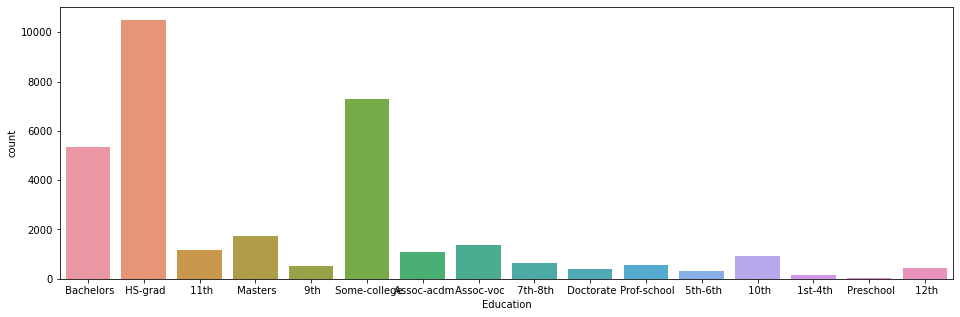

In [55]:
plt.figure(figsize = (16,5))
sns.countplot(df['Education'])


The column Education tells us about the educational background of the people group in the dataset, from the above plot we can observe that more than 10000 people fall under the category HS-grad




In [56]:
df['Education_num'].value_counts()


9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

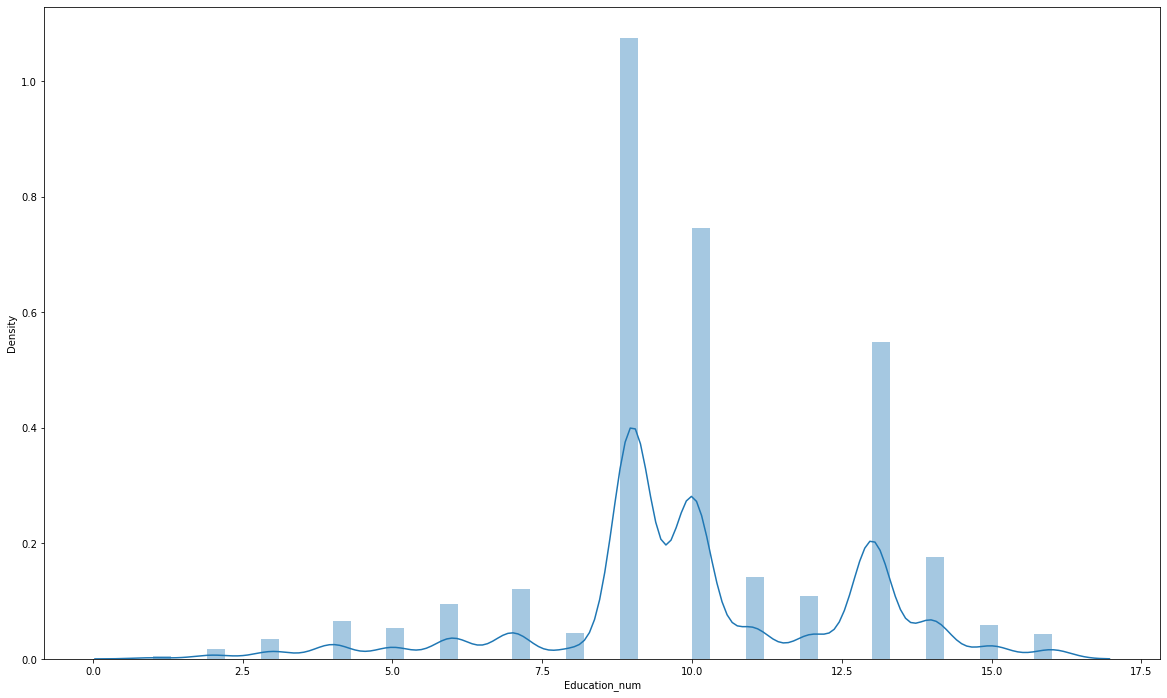

In [57]:
sns.distplot(df['Education_num'])


Education-num is the encoded data of Education, as both the columns gives us same details, its good to drop Education column and hold back the encoded column 'Education-num'



<AxesSubplot:xlabel='Marital_status', ylabel='Count'>

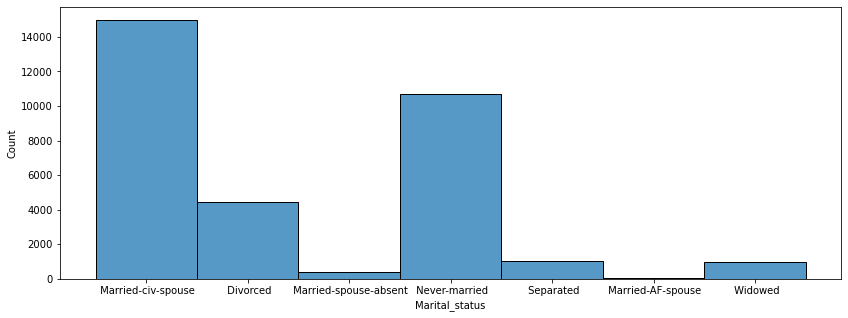

In [58]:
plt.figure(figsize = (14,5))
sns.histplot(df['Marital_status'])


The column Marital_status tells us details aout the marital status of the people group, maximum group fall uder the category 'Married-civ-spouse' as we can observe in the above graph



In [59]:
df['Occupation'].value_counts()


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

The column Occupation gives us details about the proffession data of the groups, 4000 and above groups are Prof-specialty, Craft-repair, Exec-managerial proffessionals



<AxesSubplot:xlabel='Relationship', ylabel='count'>

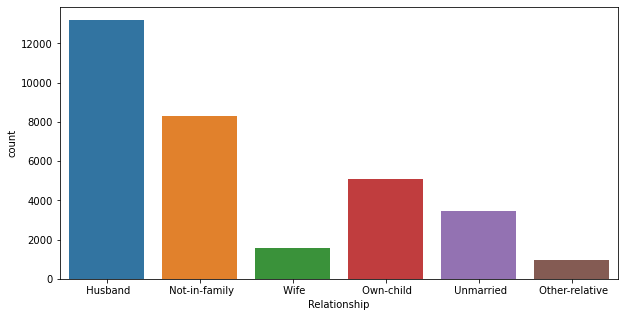

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(df['Relationship'])


This data gives us details about the relationships the out audience live with, about 12000 and above audience live with Husband and 1000 around audience live with other relatives, the same is illustrated with the plot above



<AxesSubplot:xlabel='Race', ylabel='Count'>

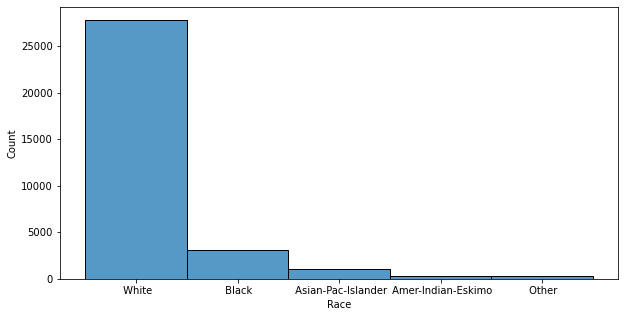

In [62]:
plt.figure(figsize=(10,5))
sns.histplot(df['Race'])


This column is about which Race the people belongs to, It is clear from the above plot that 25000 and above people ate whites, and least belong to other races



<AxesSubplot:xlabel='Sex', ylabel='count'>

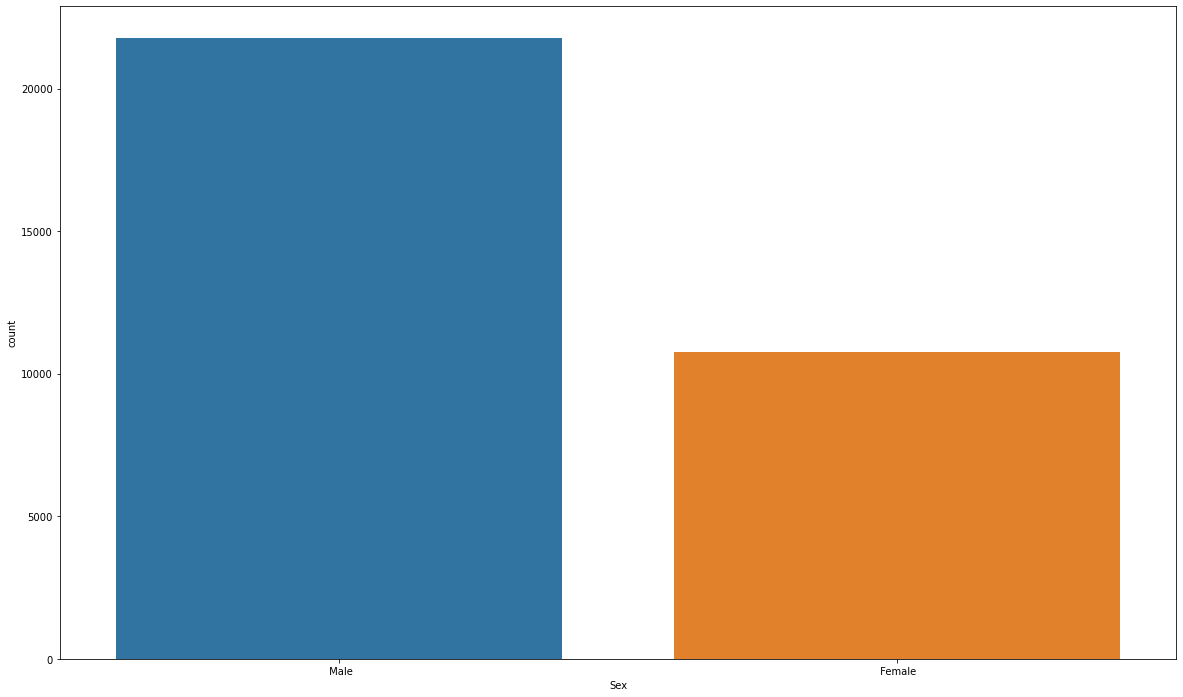

In [63]:
sns.countplot(df['Sex'])


From the above plot it is clear that the maximum number of memebers in out dataset are males



In [64]:
df['Native_country'].unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

The data above tells us about the different countries from which people migrated to US and earning in US



Text(0.5, 1.0, 'Histogram of capital loss')

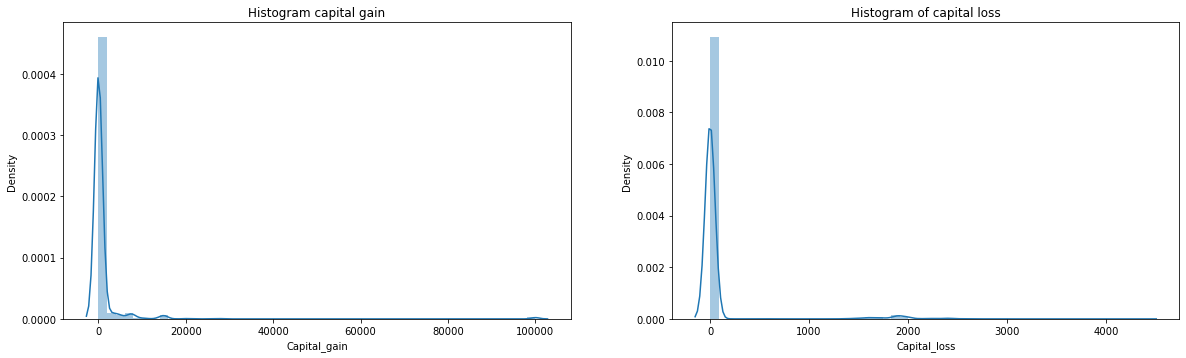

In [65]:
plt.subplot(2,2,1)
sns.distplot(df['Capital_gain'])
plt.title('Histogram capital gain')
plt.subplot(2,2,2)
sns.distplot(df['Capital_loss'])
plt.title('Histogram of capital loss')


The above plots tells us about the capital gain and loss the group of people made, both the data has left skewness in it



<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

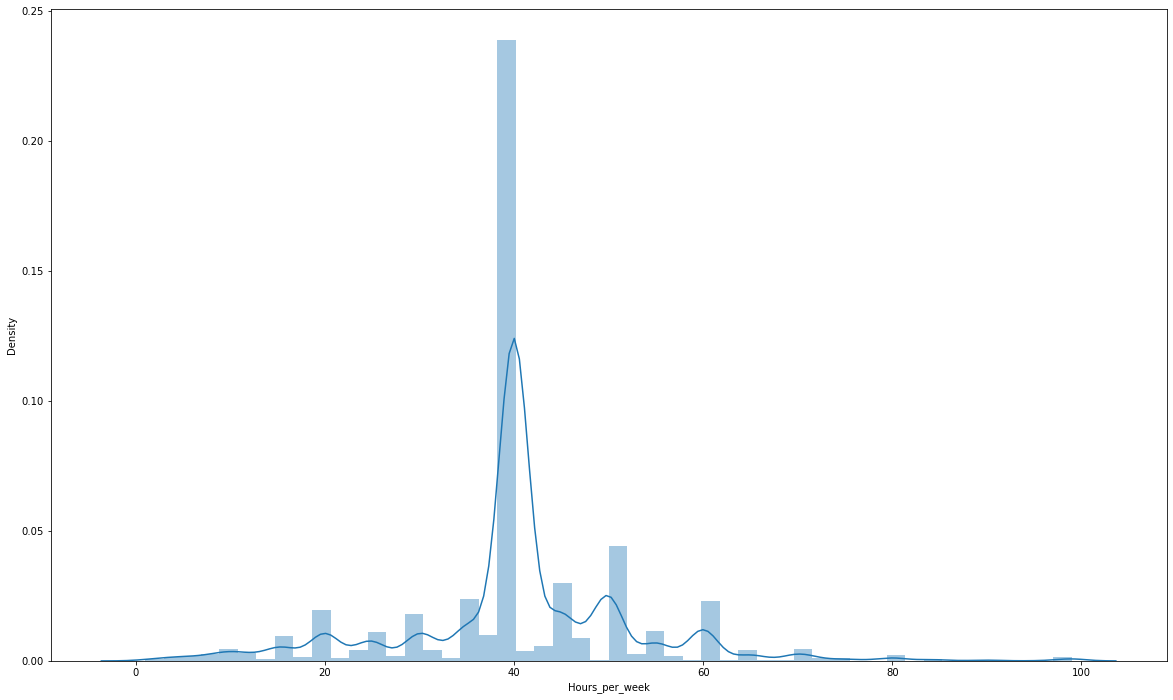

In [66]:
sns.distplot(df['Hours_per_week'])


This column tells us about number of hrs groups person works in a week, from the above plot we can observe that maximum people work 40 hrs a week in standard



<Figure size 864x360 with 0 Axes>

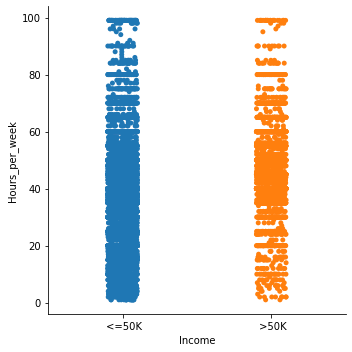

In [68]:
plt.figure(figsize = (12,5))
sns.catplot(x='Income', y='Hours_per_week', data=df)


From the above plot we can see the relationship between Income and Hours_per_week, Mostly the people whose income is <=50k work for 0 to 60 hrs a week, and for the group of people whose income in >50k work hrs are dense in the range 30 to 60 hrs a week



<Figure size 576x360 with 0 Axes>

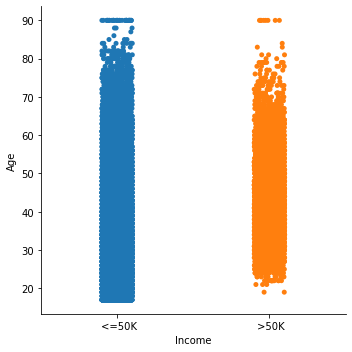

In [69]:
plt.figure(figsize = (8,5))
sns.catplot(x='Income', y='Age', data=df)


<AxesSubplot:xlabel='Occupation', ylabel='Age'>

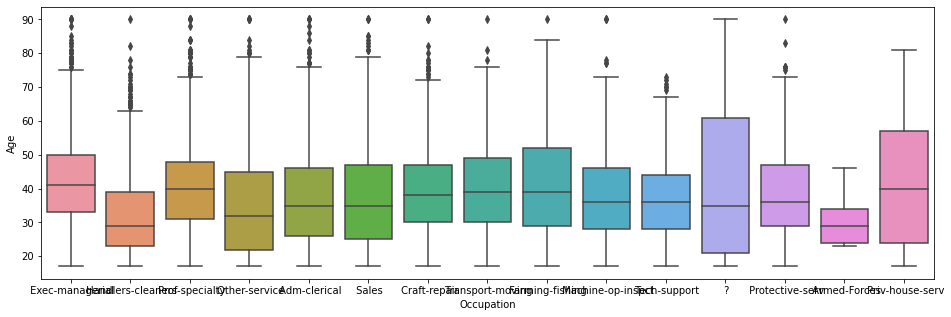

In [70]:
plt.figure(figsize = (16,5))
sns.boxplot(x='Occupation', y='Age', data=df)


<Figure size 1152x360 with 0 Axes>

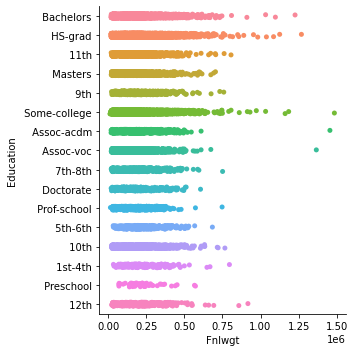

In [71]:
plt.figure(figsize = (16,5))
sns.catplot(x='Fnlwgt', y='Education', data=df)


FRom the above plot we can observe that higher weightage is given for the group of people whose education is Bachelors, Some-college and HS-grad



In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [73]:
#As we discuss before Education and Education_num, we can drop off the column Education now

df.drop(['Education'],axis=1,inplace=True)
df.shape


(32560, 14)

In [74]:
Obj_columns=df.select_dtypes(include=[object])
Obj_columns


,Workclass,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...
32555,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [76]:
for columns in Obj_columns:
    df[columns] = le.fit_transform(df[columns])


In [77]:
df.dtypes


Age               int64
Workclass         int32
Fnlwgt            int64
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

Hence all the columns in the dataset are in integer data types



In [78]:
df.describe()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


we Observe :

Mean > median (50th percentile) in the columns capital gain, capital loss these columns has left skewness

We can observe that there is a huge gap between 75th percentile and max in the columns in Age, workclass, Fnlwgt, Education_num, Marital_status, Occupation, capital gain, capital loss, Hours_per_week there are outliers in these columns

As there is high difference between mean and std in Age, Education, Race, Capital gain and loss, Hours per week, Native country the data is highly spreaded


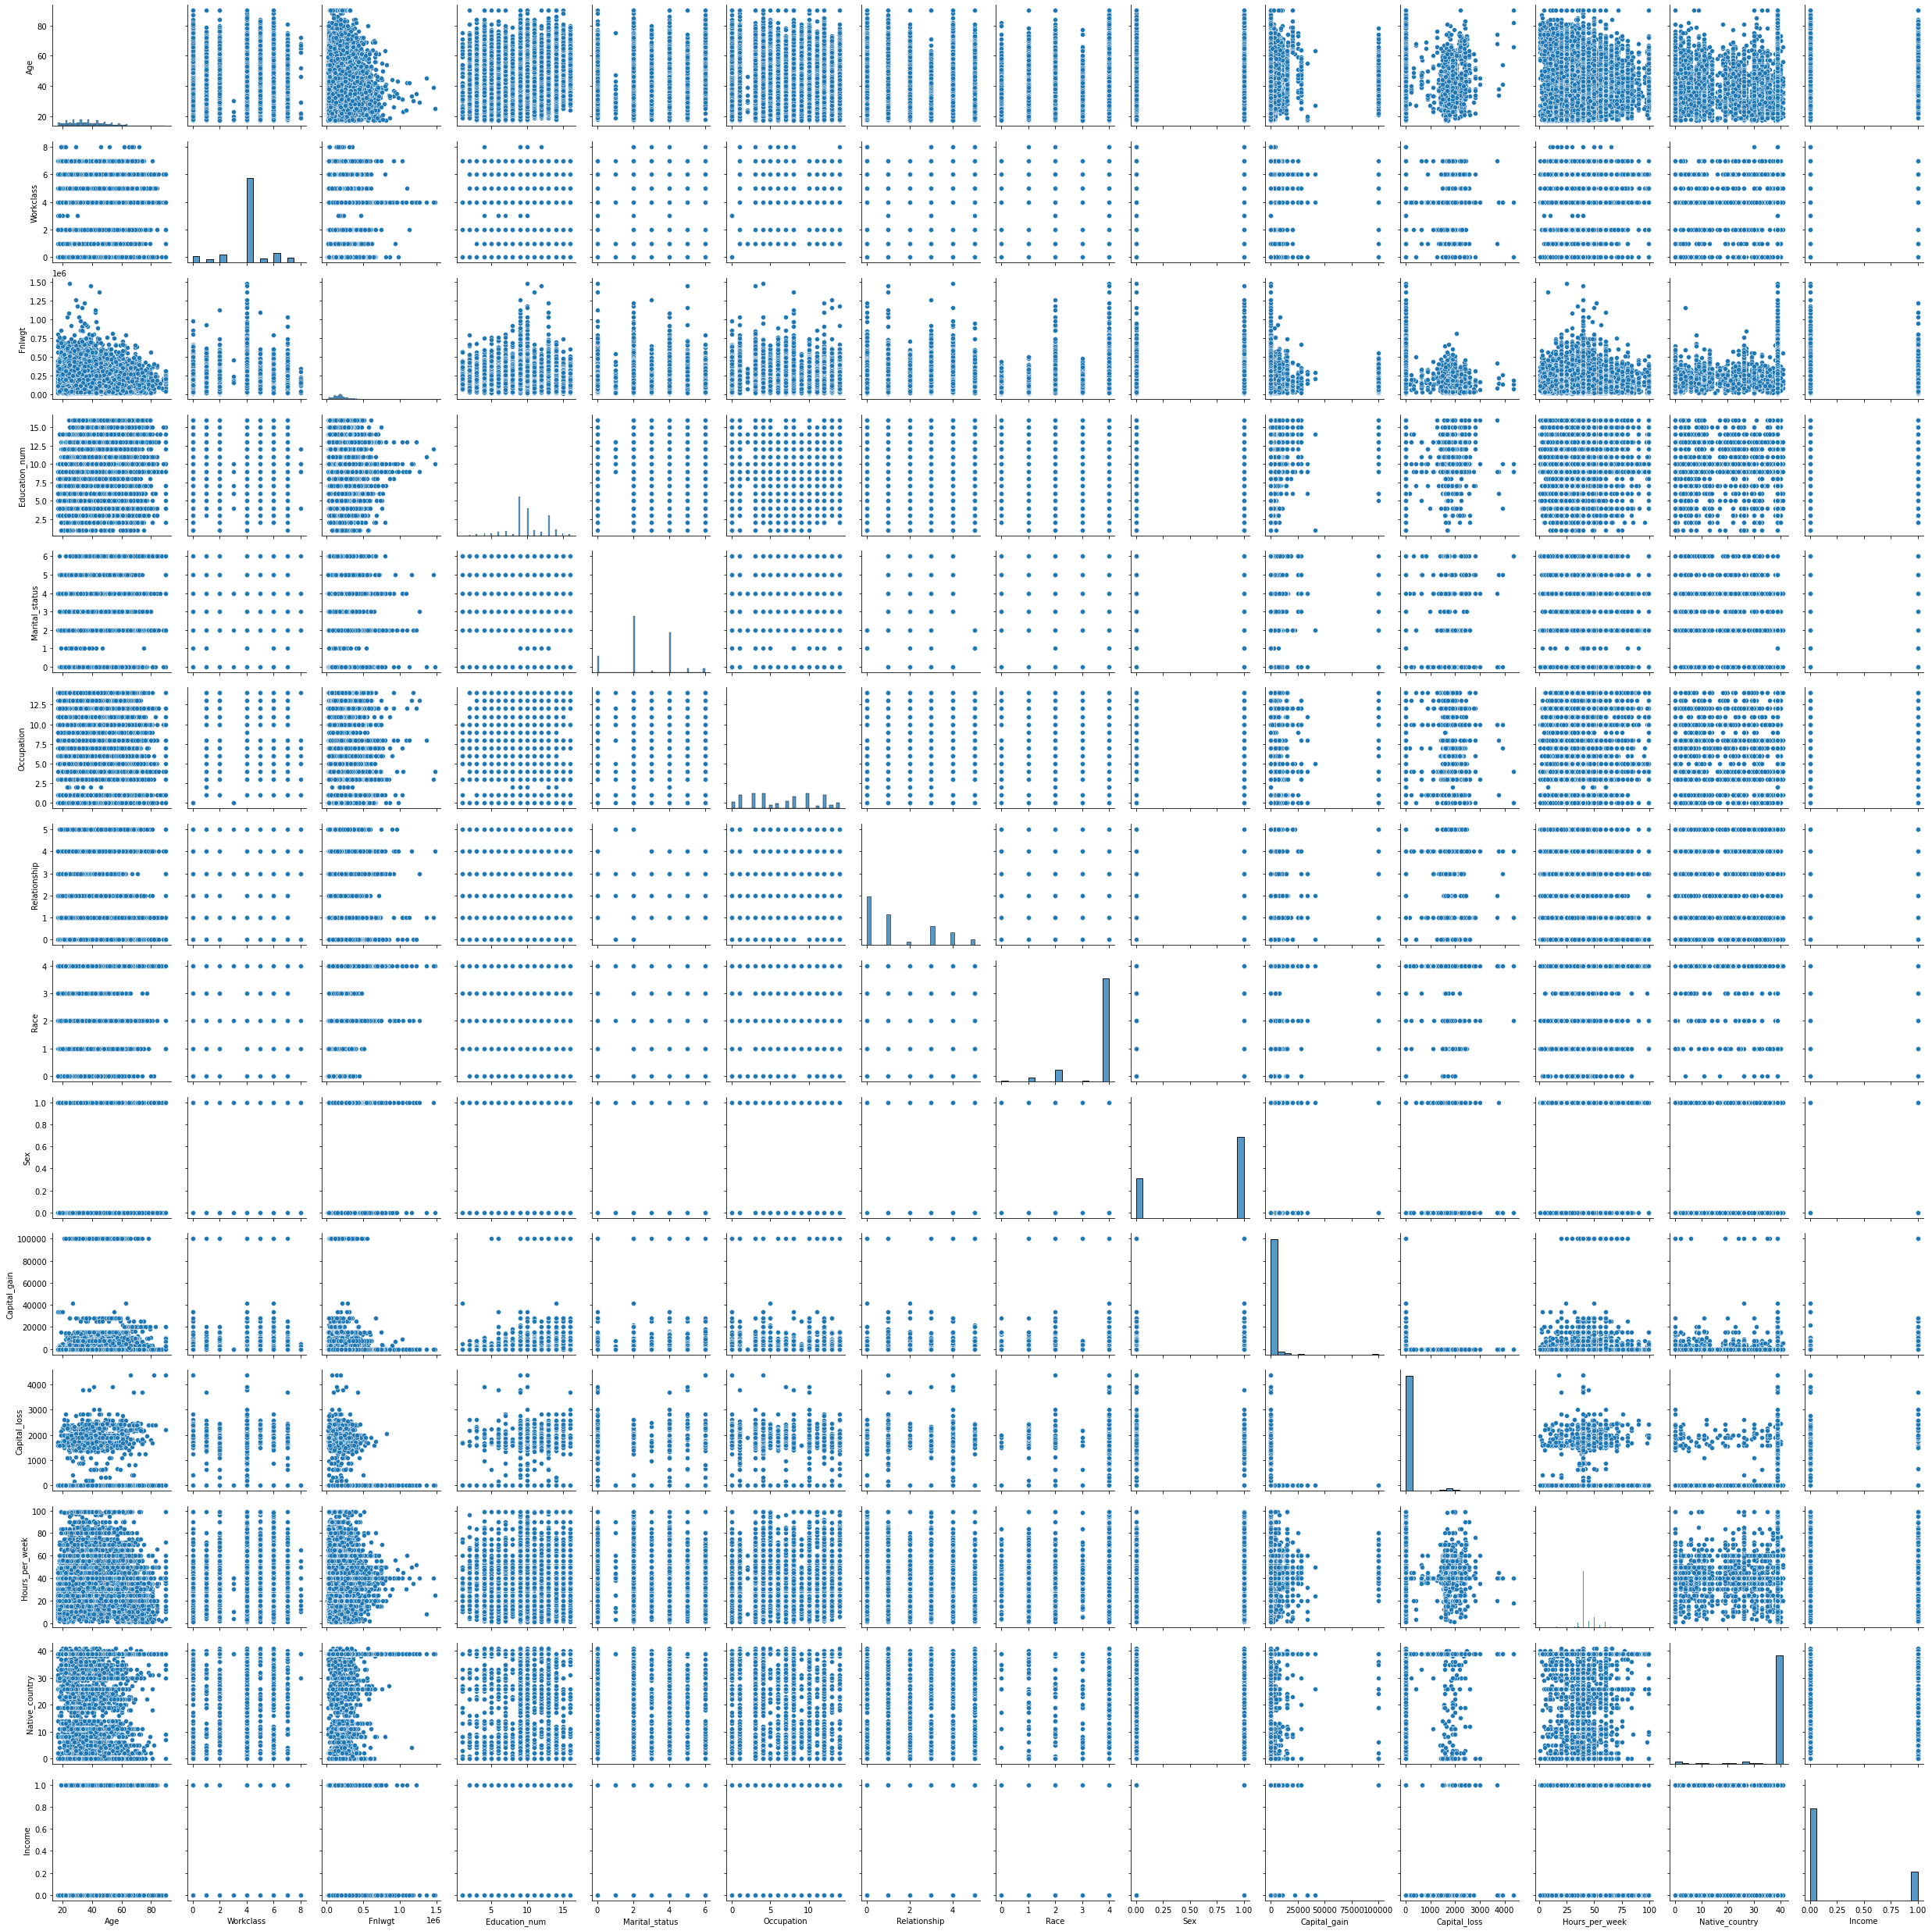

In [79]:
sns.pairplot(df)

In [80]:
df.corr()


,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education_num,0.036527,0.052015,-0.043159,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995
Capital_gain,0.077674,0.033828,0.000437,0.122627,-0.043398,0.025511,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,-0.001984,0.223333


<AxesSubplot:>

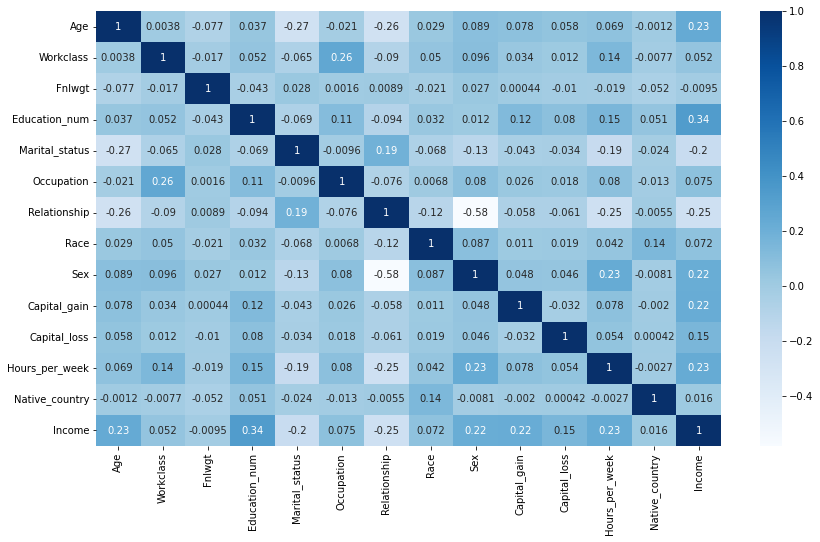

In [81]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)


Key Observation :

From the above map we can observe that the Income has a better correlation with Age, Education_num, Sex, Hours_per_week

Income is negatively correlated with Fnlwgt, Marital status, Relatioship


Age                  AxesSubplot(0.125,0.772143;0.227941x0.107857)
Workclass         AxesSubplot(0.398529,0.772143;0.227941x0.107857)
Fnlwgt            AxesSubplot(0.672059,0.772143;0.227941x0.107857)
Education_num        AxesSubplot(0.125,0.642714;0.227941x0.107857)
Marital_status    AxesSubplot(0.398529,0.642714;0.227941x0.107857)
Occupation        AxesSubplot(0.672059,0.642714;0.227941x0.107857)
Relationship         AxesSubplot(0.125,0.513286;0.227941x0.107857)
Race              AxesSubplot(0.398529,0.513286;0.227941x0.107857)
Sex               AxesSubplot(0.672059,0.513286;0.227941x0.107857)
Capital_gain         AxesSubplot(0.125,0.383857;0.227941x0.107857)
Capital_loss      AxesSubplot(0.398529,0.383857;0.227941x0.107857)
Hours_per_week    AxesSubplot(0.672059,0.383857;0.227941x0.107857)
Native_country       AxesSubplot(0.125,0.254429;0.227941x0.107857)
Income            AxesSubplot(0.398529,0.254429;0.227941x0.107857)
dtype: object

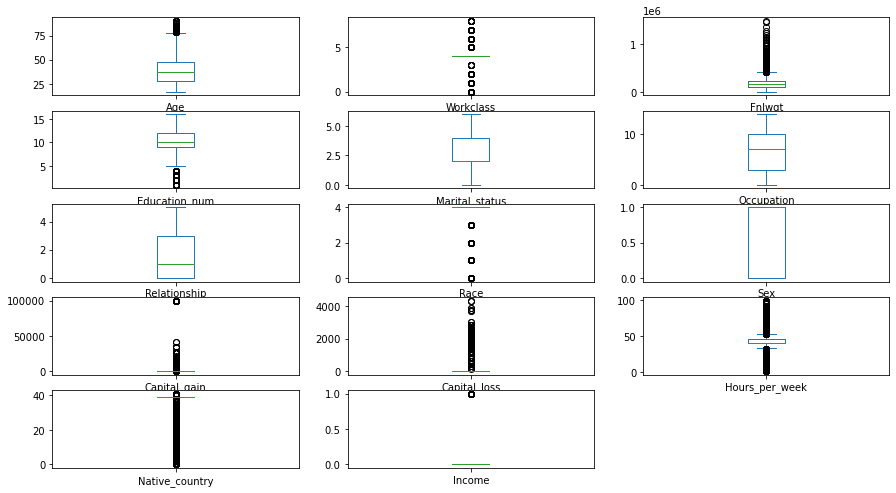

In [82]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,10))


In [83]:
# To remove the outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.sample(5)


,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
2562,54,1,175083,9,4,1,4,4,0,0,0,20,39,0
4360,25,4,125159,12,2,6,0,2,1,0,0,40,23,0
25524,37,4,39606,11,0,12,4,4,0,0,0,40,39,0
7425,62,6,102631,10,6,5,4,4,0,0,0,50,39,0
13362,21,4,203076,9,4,6,3,4,1,0,0,35,39,0


In [84]:
df_new.shape


(27417, 14)

There are 27417 rows and 14 columns in new dataset after removing outliers.


In [85]:
df.shape


(32560, 14)

There are 32560 rows and 14 columns in old dataset


In [86]:
# Now we can check for data loss

Dataloss = (((32560-27417)/32560)*100)
Dataloss


15.795454545454547

In [87]:
df_new.skew()


Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675
Income             1.324919
dtype: float64

In [88]:
# we can observe that there is skewness present in the data in case of Race, Capital_gain, Income, Fnlwgt

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')


In [89]:
df_new[['Race','Capital_gain','Fnlwgt']] = scaler.fit_transform(df_new[['Race','Capital_gain','Fnlwgt']].values)


Hence the skewness is removed from the data



We can now check for multicolinearity



In [90]:
# Data to Predict AveragePrice
x=df_new.drop(['Income'],axis=1)
x.sample()


,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
6984,55,7,0.004778,13,2,1,0,0.347164,1,3.366533,0,38,39


In [91]:
y=df_new['Income']
y


0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 27417, dtype: int32

In [92]:
y.shape,x.shape


((27417,), (27417, 13))

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [94]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)


In [95]:
vif_calc()

    VIF Factor        Features
0    10.085800             Age
1     8.659269       Workclass
2     1.017061          Fnlwgt
3    19.567232   Education_num
4     4.284579  Marital_status
5     3.657030      Occupation
6     2.918293    Relationship
7     1.048316            Race
8     4.454022             Sex
9     1.027375    Capital_gain
10    1.004033    Capital_loss
11   15.093491  Hours_per_week
12   51.792025  Native_country


From the above table we can see that the columns Native_country and Education_num are creating multicolinearity, from the heat map we can also observe that Native_country is giving lesser contribution to income when compared to Education_num, so its good to drop Native_country



In [96]:
x = x.drop(["Native_country"],axis=1)
x.shape


(27417, 12)

In [97]:
vif_calc()

    VIF Factor        Features
0     7.906167             Age
1     8.205893       Workclass
2     1.016982          Fnlwgt
3    14.970706   Education_num
4     3.747155  Marital_status
5     3.646706      Occupation
6     2.442970    Relationship
7     1.048238            Race
8     4.124759             Sex
9     1.019762    Capital_gain
10    1.003979    Capital_loss
11   13.238435  Hours_per_week


Now we can again observe that Education and Hours per week are creating multicolinearity, We can drop Hours per week as its contribution to income is only 0.23 and 0.34 contribution is given by Education_num



In [98]:
x = x.drop(["Hours_per_week"],axis=1)
x.shape


(27417, 11)

In [99]:
vif_calc()


    VIF Factor        Features
0     7.404404             Age
1     7.801335       Workclass
2     1.016945          Fnlwgt
3    12.443921   Education_num
4     3.744829  Marital_status
5     3.640936      Occupation
6     2.427387    Relationship
7     1.047917            Race
8     3.819356             Sex
9     1.019656    Capital_gain
10    1.003976    Capital_loss


here the multicolinearity is removed

In [100]:
# Splitting the data for training and testing the model

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)



In [101]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((20562, 11), (6855, 11), (20562,), (6855,))

In [102]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()


In [105]:
model=[lg,gnb,svc,dtc,knn,rf]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of ",m,"is : ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('++++++++++++++++++++++++++++\n')


Accuracy score of  LogisticRegression() is : 
0.8129832239241429
[[4990  329]
 [ 953  583]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5319
           1       0.64      0.38      0.48      1536

    accuracy                           0.81      6855
   macro avg       0.74      0.66      0.68      6855
weighted avg       0.79      0.81      0.79      6855

++++++++++++++++++++++++++++

Accuracy score of  GaussianNB() is : 
0.7428154631655726
[[3855 1464]
 [ 299 1237]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      5319
           1       0.46      0.81      0.58      1536

    accuracy                           0.74      6855
   macro avg       0.69      0.77      0.70      6855
weighted avg       0.82      0.74      0.76      6855

++++++++++++++++++++++++++++

Accuracy score of  SVC() is : 
0.8169219547775346
[[5183  136]
 [1119  417]]
              precision    recall

From all the models above we can observe that RandomForestClassifier() is working best giving the accuracy of 84%



In [106]:
from sklearn.model_selection import cross_val_score


In [107]:
model1=[lg,gnb,dtc,knn,rf]
for m in model1:
    score=cross_val_score(m,x_train,y_train,cv=5)
    print("Score of : ",m )
    print(score*100)
    print(score.mean()*100)
    print(score.std()*100)
    print('\n')


Score of :  LogisticRegression()
[81.71650863 81.91101386 82.10116732 81.85797665 81.83365759]
81.88406480921743
0.12582233665537212


Score of :  GaussianNB()
[30.31850231 73.96061269 74.87840467 74.90272374 75.29182879]
65.87041443993185
17.78133466008082


Score of :  DecisionTreeClassifier()
[80.13615366 80.81692195 80.17996109 79.6692607  79.96108949]
80.15267737959077
0.3775277190887854


Score of :  KNeighborsClassifier()
[81.78944809 82.44590323 82.63618677 82.63618677 82.95233463]
82.49201189925463
0.38708958054836956


Score of :  RandomForestClassifier()
[84.26938974 85.87405787 84.84922179 84.92217899 84.97081712]
84.9771331007974
0.514741847472341




With CV also we can see that RandomForestClassifier() is giving a better mean score of 84.9%



In [108]:
# Parameter tuning

from sklearn.model_selection import GridSearchCV


In [109]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy','log_loss']}


In [110]:
grd=GridSearchCV(estimator=rf,param_grid=params,cv=5)


In [111]:
grd.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']})

In [112]:
grd.best_score_


0.8495283413793787

In [113]:
grd.best_params_


{'criterion': 'gini'}

In [114]:
rf=RandomForestClassifier(criterion='gini')
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.8455142231947483
[[4922  397]
 [ 662  874]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5319
           1       0.69      0.57      0.62      1536

    accuracy                           0.85      6855
   macro avg       0.78      0.75      0.76      6855
weighted avg       0.84      0.85      0.84      6855



RandomForestClassifier with criterion='gini' gives the better score (84%) so we can choose this to be our best model



In [115]:
# Saving the best model

final_model=RandomForestClassifier(criterion='gini')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.8447848285922684
[[4918  401]
 [ 663  873]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5319
           1       0.69      0.57      0.62      1536

    accuracy                           0.84      6855
   macro avg       0.78      0.75      0.76      6855
weighted avg       0.84      0.84      0.84      6855



In [116]:
# We can save the model now
import joblib
joblib.dump(final_model,'Census_income_Prediction.obj')



['Census_income_Prediction.obj']

In [117]:
Income_prediction=joblib.load('Census_income_Prediction.obj')


In [118]:
pred=Income_prediction.predict(x_test)
print("Predicted values :",pred)


Predicted values : [0 0 0 ... 0 1 0]


In [119]:
y_test


7409     0
21693    0
18788    0
18570    1
10013    0
        ..
12548    0
26057    0
24395    0
18597    1
30260    0
Name: Income, Length: 6855, dtype: int32

In [120]:
# Making a DataFrame of Predicted values and Original values
df1=pd.DataFrame({'Predicted values':pred,'Original values':y_test})
df1


,Predicted values,Original values
7409,0,0
21693,0,0
18788,0,0
18570,1,1
10013,0,0
...,...,...
12548,0,0
26057,0,0
24395,0,0
18597,1,1


We can observe that the predicted values are almost same as original values, the model we finalised is working with 84% efficiency

completed the task